**# Step 1: ให้หา datasets ที่จะใช้ในการทำ Model Regression**
[Kaggle Datasets](https://www.kaggle.com/datasets?search=regression)

**GOAL**: *Build, Train, and Test a regression model to perform regression tasks and predict chances of university admission given student's profile.*

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/COE64-335_Machine-Learning/Lecture4-Regression"

/content/drive/MyDrive/COE64-335_Machine-Learning/Lecture4-Regression


In [ ]:
# Read the CSV file
university_df = pd.read_csv("university_admission.csv")

In [ ]:
# Display the feature columns (มี Column ชื่ออะไรบ้าง)
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [ ]:
# Check the shape of the dataframe (เช็คขนาดข้อมูลว่ามีกี่แถว กี่คอลัมน์) ->.shape
university_df.shape

(1000, 8)

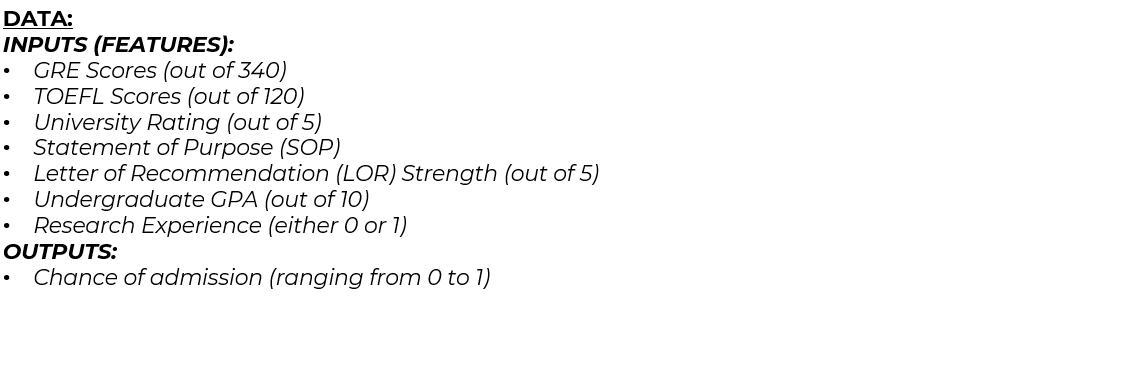

In [ ]:
university_df.head(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
# Check data types of each column ->.dtypes
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [ ]:
# Check if any missing values are present in the dataframe -> .isnull().sum()
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

**# Step2: ถ้าในกรณีที่ข้อมูลเป็นแบบ categorical ให้เติมค่า Missing value ด้วย [Pandas – Filling NaN in Categorical data](https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/)**

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

**# Step4: สร้างตัวแปรสำหรับเก็บ Input data และ Output data**

In [ ]:
# สร้างตัวแปร X เพื่อเก็บ Input data
X = university_df.drop(columns = ['Chance_of_Admission'])

In [ ]:
#สร้างตัวแปร y สำหรับเก็บ Output data
y = university_df['Chance_of_Admission']

In [ ]:
#แปลงข้อมูลจาก Dataframe X และ y ให้เป็น Array X และ Array y
# reshaping the Array y ให้มองเป็นคอลัมน์ด้วย
X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)

**# Step5: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [ ]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

**# Step6: Training Model with XG-BOOST ALGORITHM (สร้าง Model ในการทำนาย)**

In [ ]:
!pip install xgboost

# Train an XGBoost regressor model

import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

model_xgb.fit(X_train, y_train) #เอาข้อมูล Training (input และ output) เข้าสู่กระบวนการสร้าง Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**# Step7: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [ ]:
# make predictions on the test data
yXGB_predict = model_xgb.predict(X_test)

In [ ]:
#Evaluate the performance of model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, yXGB_predict)),'.3f'))
MSE = round(mean_squared_error(y_test, yXGB_predict),3)
MAE = round(mean_absolute_error(y_test, yXGB_predict),3)
r2 = round(r2_score(y_test, yXGB_predict),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.054 
MSE = 0.003 
MAE = 0.035 
R2 = 0.841


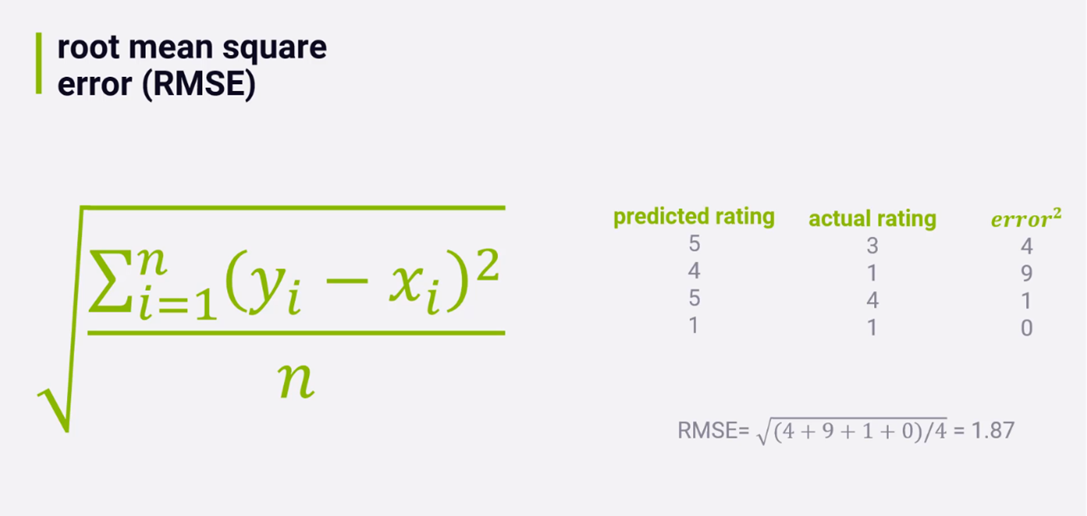

**# Step8: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [ ]:
# loading library
import pickle

In [ ]:
# create an iterator object with write permission - model.pickle and save model
with open('model_xgb', 'wb') as files:
    pickle.dump(model_xgb, files)

In [ ]:
# load saved model
with open('model_xgb' , 'rb') as f:
    lr = pickle.load(f)


In [ ]:
# นำข้อมูลชุดใหม่มาทำการ prediction
#จากตัวอย่างเลือกเอาข้อมูล 5 แถวแรกจากตัวแปร X มาใช้ในการ deployment
deploy_df = X[11:15,:]

deploy_df

array([[327. , 111. ,   4. ,   4. ,   4.5,   9. ,   1. ],
       [328. , 112. ,   4. ,   4. ,   4.5,   9.1,   1. ],
       [307. , 109. ,   3. ,   4. ,   3. ,   8. ,   1. ],
       [311. , 104. ,   3. ,   3.5,   2. ,   8.2,   1. ]])

In [ ]:
#deploy_arr = deploy_df.astype(np.float32)
#deploy_arr

In [ ]:
#y[0:4,:]

In [ ]:
#แปลงข้อมูลชุดใหม่ที่อ่านมาได้ ให้อยู่ในรูปแบบ array ->np.array


In [ ]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_df)
deploy_Y

array([0.81266254, 0.84487826, 0.6125589 , 0.6592233 ], dtype=float32)

In [ ]:
deploy_Y.shape

(4,)

In [ ]:
deploy_arr=deploy_Y.reshape((-1, 1))

In [ ]:
deploy_arr.shape

(4, 1)

In [ ]:
deploy_df.shape

(4, 7)

**# สรุป Output ที่ได้จากการนำ model ไป deployment**

In [ ]:
pd.DataFrame(np.concatenate((deploy_arr, deploy_df), axis=1))

,0,1,2,3,4,5,6,7
0,0.812663,327.0,111.0,4.0,4.0,4.5,9.0,1.0
1,0.844878,328.0,112.0,4.0,4.0,4.5,9.1,1.0
2,0.612559,307.0,109.0,3.0,4.0,3.0,8.0,1.0
3,0.659223,311.0,104.0,3.0,3.5,2.0,8.2,1.0


# วิธีการแทน Category Missing Value

In [ ]:
# import modules
import numpy as np
import pandas as pd

# create dataset
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 8],

		'Gender': ['M', 'M', 'F', np.nan,
				np.nan, 'F', 'M', 'F'],

		'Color': [np.nan, "Red", "Blue",
				"Red", np.nan, "Red",
				"Green", np.nan]}

# convert to data frame
df = pd.DataFrame(data)
display(df)


,Id,Gender,Color
0,1,M,NaN
1,2,M,Red
2,3,F,Blue
3,4,NaN,Red
4,5,NaN,NaN
5,6,F,Red
6,7,M,Green
7,8,F,NaN


In [ ]:
# filling with most common class
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean



,Id,Gender,Color
0,1,M,Red
1,2,M,Red
2,3,F,Blue
3,4,M,Red
4,5,M,Red
5,6,F,Red
6,7,M,Green
7,8,F,Red
